In [96]:
%pylab inline

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [5]:
data = pd.read_csv('Downloads/adult.data')

In [6]:
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
data.tail()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [8]:
data.describe()

,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [21]:
for c in data.columns.to_list():
    data[c.strip()] = data[c]

In [27]:
data = data.drop(list(filter(lambda x: x[0] == ' ', data.columns.to_list())), axis = 1)

In [29]:
data.columns

Index(['39', 'State-gov', '77516', 'Bachelors', '13', 'Never-married',
       'Adm-clerical', 'Not-in-family', 'White', 'Male', '2174', '0', '40',
       'United-States', '<=50K'],
      dtype='object')

In [58]:
data['<=50K'].describe?

Object `describe` not found.


In [60]:
data['<=50K'].describe?

Object `describe` not found.


In [81]:
data['<=50K'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [82]:
data['High-Income'] = data['<=50K'].map(lambda x: 1 if x == ' >50K' else 0)

In [88]:
data['High-Income'].describe()

count    32560.000000
mean         0.240817
std          0.427586
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: High-Income, dtype: float64

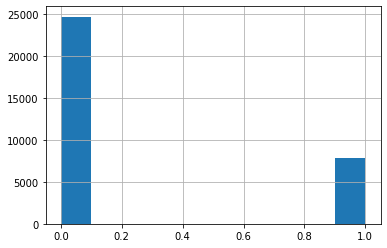

In [97]:
data['High-Income'].hist()

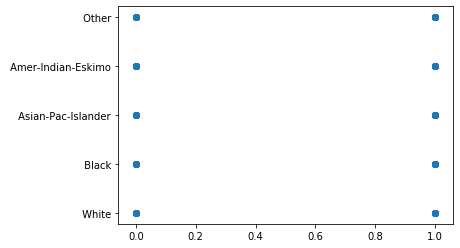

In [98]:
plt.scatter(data['High-Income'], data['White'])

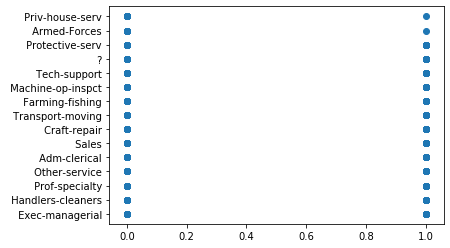

In [99]:
plt.scatter(data['High-Income'], data['Adm-clerical'])

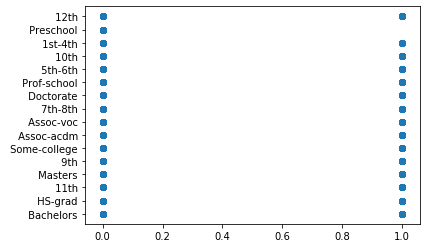

In [100]:
plt.scatter(data['High-Income'], data['Bachelors'])

In [101]:
data.corr()

,39,77516,13,2174,0,40,High-Income
39,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
77516,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
13,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
2174,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
0,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
40,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
High-Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


## Get f1 Scores

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [108]:
X_train, X_test, y_train, y_test = train_test_split(data[filter(lambda x: x != 'High-Income' and x != '<=50K',data.columns.to_list())], data['High-Income'], test_size=0.3)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((22792, 14), (9768, 14), (22792,), (9768,))

In [109]:
X_train.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
21194,55,Private,196126,Bachelors,13,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,?
8722,18,Private,156874,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,27,United-States
6310,37,Private,31368,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
11456,62,Federal-gov,159165,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,0,36,United-States
479,33,Private,111746,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,Portugal


In [112]:
y_pred = X_test['White'].map(lambda x: 0)

y_pred

12145    0
884      0
23851    0
584      0
17630    0
        ..
1796     0
29018    0
27879    0
25506    0
30324    0
Name: White, Length: 9768, dtype: int64

In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      7438
           1       0.00      0.00      0.00      2330

    accuracy                           0.76      9768
   macro avg       0.38      0.50      0.43      9768
weighted avg       0.58      0.76      0.66      9768



In [116]:
def split_data(data):
    return train_test_split(data[filter(lambda x: x != 'High-Income' and x != '<=50K',data.columns.to_list())], data['High-Income'], test_size=0.3)

In [125]:
# Numeric Colors

c_dct = {}

for i, c in enumerate(data.White.unique()):
    c_dct[c] = i
    
data['Color'] = data['White'].map(lambda x: c_dct[x])

In [128]:
# Numeric Degrees

d_dct = {}

for i, d in enumerate(data['Bachelors'].unique()):
    d_dct[d] = i
    
data['Degree'] = data['Bachelors'].map(lambda x: d_dct[x])

In [129]:
# Numeric Jobs

j_dct = {}

for i, j in enumerate(data['Adm-clerical'].unique()):
    j_dct[j] = i
    
data['Job'] = data['Adm-clerical'].map(lambda x: j_dct[x])

In [131]:
data.corr()

,39,77516,13,2174,0,40,High-Income,Color,Degree,Job
39,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039,-0.039999,0.007768,-0.000245
77516,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481,0.000488,0.024157,0.013120
13,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182,-0.039748,-0.279589,-0.284144
2174,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333,-0.007990,0.024159,-0.066277
0,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523,-0.017192,-0.003199,-0.037941
40,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690,-0.033115,-0.050027,-0.081628
High-Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000,-0.067720,-0.046237,-0.161575
Color,-0.039999,0.000488,-0.039748,-0.007990,-0.017192,-0.033115,-0.067720,1.000000,0.029628,0.023677
Degree,0.007768,0.024157,-0.279589,0.024159,-0.003199,-0.050027,-0.046237,0.029628,1.000000,0.065647
Job,-0.000245,0.013120,-0.284144,-0.066277,-0.037941,-0.081628,-0.161575,0.023677,0.065647,1.000000


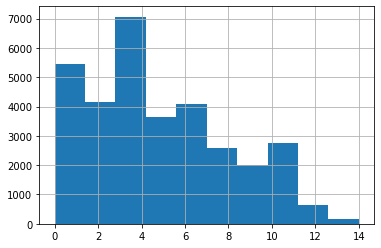

In [132]:
data['Job'].hist()

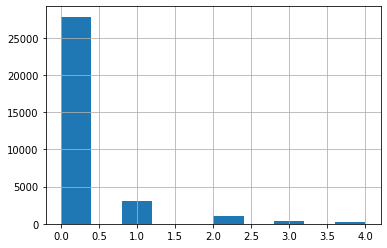

In [133]:
data['Color'].hist()

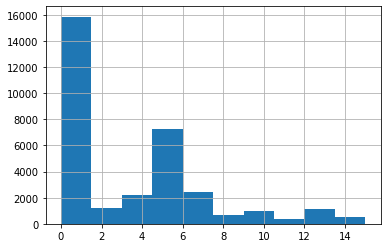

In [134]:
data['Degree'].hist()

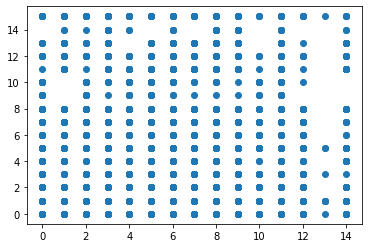

In [136]:
plt.scatter(data['Job'], data['Degree'])

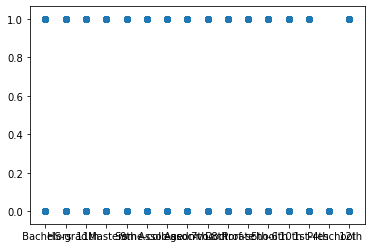

In [137]:
plt.scatter(data['Bachelors'], data['High-Income'])

Color
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
Name: High-Income, dtype: object

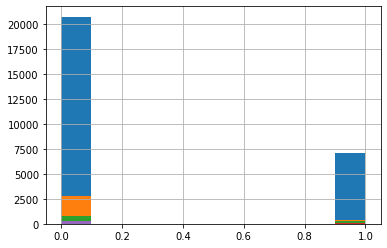

In [144]:
data.groupby('Color')['High-Income'].hist()

Job
0     AxesSubplot(0.125,0.125;0.775x0.755)
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
13    AxesSubplot(0.125,0.125;0.775x0.755)
14    AxesSubplot(0.125,0.125;0.775x0.755)
Name: High-Income, dtype: object

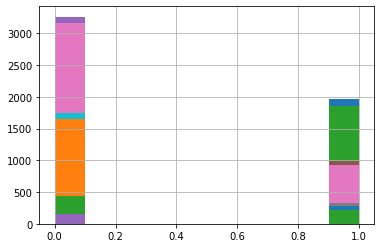

In [141]:
data.groupby('Job')['High-Income'].hist()

Degree
0     AxesSubplot(0.125,0.125;0.775x0.755)
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
13    AxesSubplot(0.125,0.125;0.775x0.755)
14    AxesSubplot(0.125,0.125;0.775x0.755)
15    AxesSubplot(0.125,0.125;0.775x0.755)
Name: High-Income, dtype: object

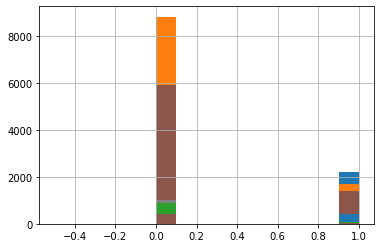

In [142]:
data.groupby('Degree')['High-Income'].hist()

High-Income
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: White, dtype: object

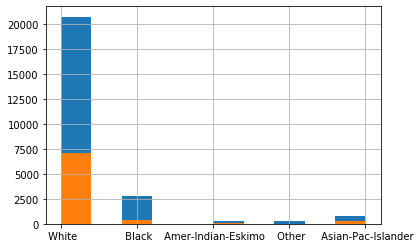

In [146]:
data.groupby('High-Income')['White'].hist()

High-Income
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Adm-clerical, dtype: object

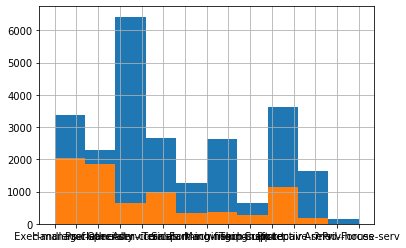

In [147]:
data.groupby('High-Income')['Adm-clerical'].hist()

High-Income
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Bachelors, dtype: object

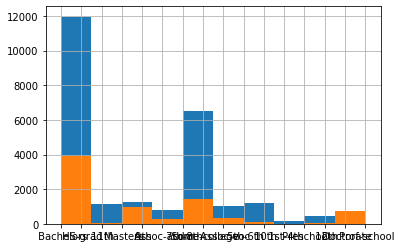

In [149]:
data.groupby('High-Income')['Bachelors'].hist()

Bachelors
 10th            AxesSubplot(0.125,0.125;0.775x0.755)
 11th            AxesSubplot(0.125,0.125;0.775x0.755)
 12th            AxesSubplot(0.125,0.125;0.775x0.755)
 1st-4th         AxesSubplot(0.125,0.125;0.775x0.755)
 5th-6th         AxesSubplot(0.125,0.125;0.775x0.755)
 7th-8th         AxesSubplot(0.125,0.125;0.775x0.755)
 9th             AxesSubplot(0.125,0.125;0.775x0.755)
 Assoc-acdm      AxesSubplot(0.125,0.125;0.775x0.755)
 Assoc-voc       AxesSubplot(0.125,0.125;0.775x0.755)
 Bachelors       AxesSubplot(0.125,0.125;0.775x0.755)
 Doctorate       AxesSubplot(0.125,0.125;0.775x0.755)
 HS-grad         AxesSubplot(0.125,0.125;0.775x0.755)
 Masters         AxesSubplot(0.125,0.125;0.775x0.755)
 Preschool       AxesSubplot(0.125,0.125;0.775x0.755)
 Prof-school     AxesSubplot(0.125,0.125;0.775x0.755)
 Some-college    AxesSubplot(0.125,0.125;0.775x0.755)
Name: White, dtype: object

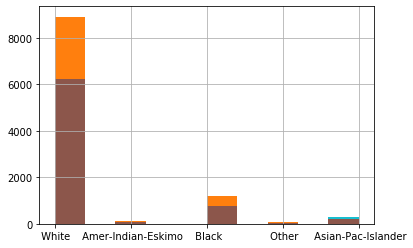

In [153]:
data.groupby('Bachelors')['White'].hist()

Degree
0     AxesSubplot(0.125,0.125;0.775x0.755)
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
13    AxesSubplot(0.125,0.125;0.775x0.755)
14    AxesSubplot(0.125,0.125;0.775x0.755)
15    AxesSubplot(0.125,0.125;0.775x0.755)
Name: White, dtype: object

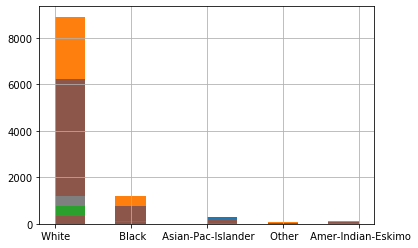

In [154]:
data.groupby('Degree')['White'].hist()

In [155]:
X_train, X_test, y_train, y_test = split_data(data)

In [156]:
y_pred = X_test['White'].map(lambda x: 1 if x == ' White' else 0)

In [157]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.17      0.28      7455
           1       0.25      0.92      0.40      2313

    accuracy                           0.34      9768
   macro avg       0.56      0.54      0.34      9768
weighted avg       0.72      0.34      0.31      9768

